In [1]:
import keggpathx as kp

import pandas as pd

#import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from pymnet import *



In [2]:
org=[['sai','01100'],['tac','01100'],['eco','01040'],['hsa','01040'],['ptr','01040'],['ath','01040'],['mmu','01040'],['cac','01100'],['cel','01040'],['dme','01040'],['lma','01040'],['sce','01040'],['sfx','01040']]

In [3]:
for i in org:
    locals()['G_'+str(i[0])], locals()['NODOS_'+str(i[0])], locals()['EDGES_'+str(i[0])] =kp.net_label(i[0],i[1])   

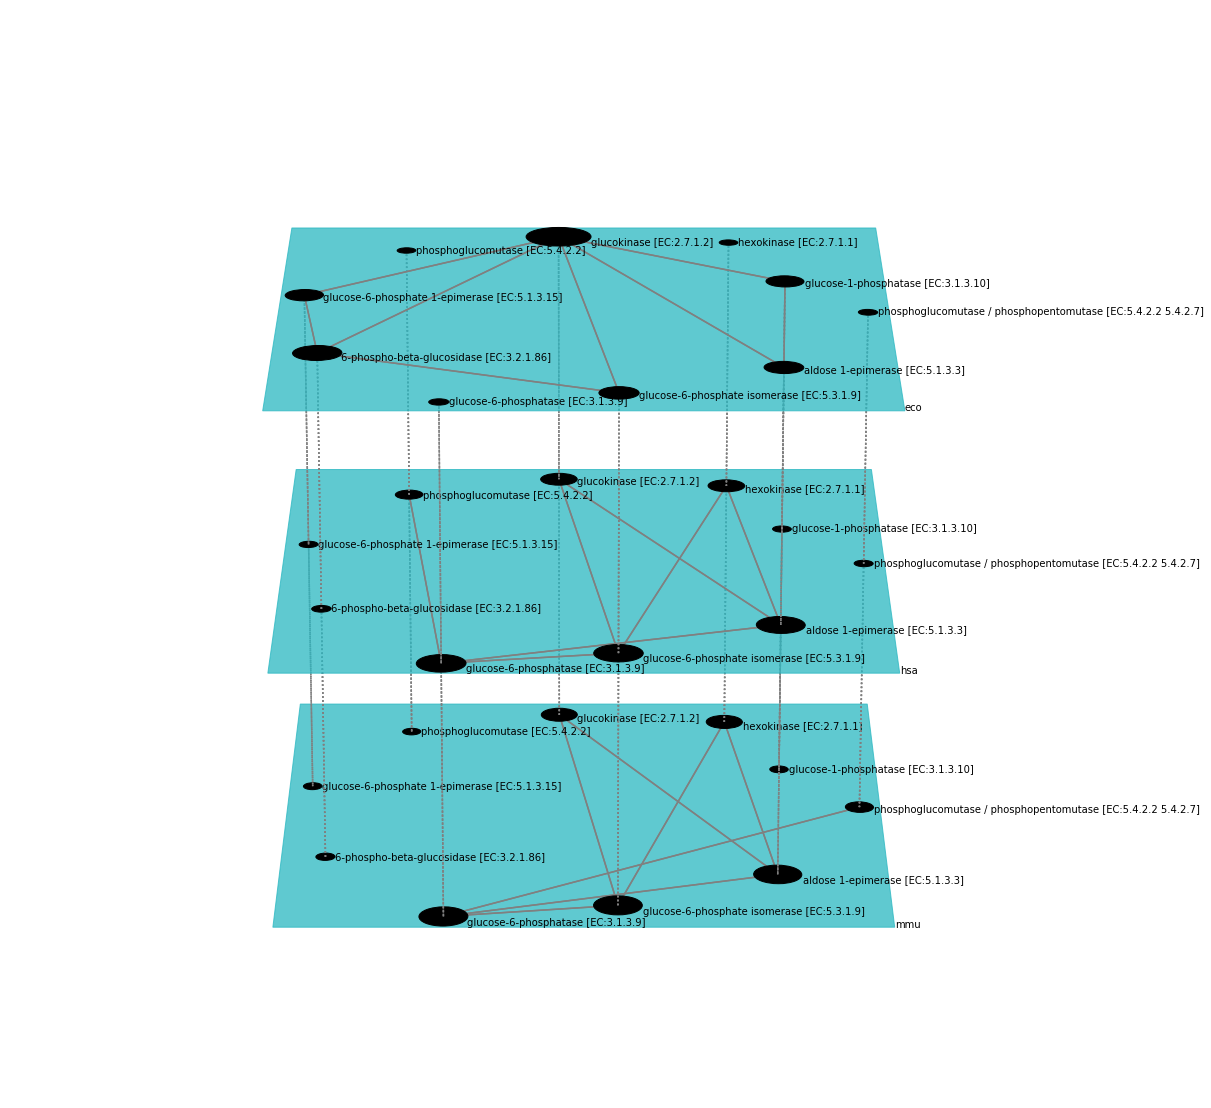

/home/haku/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [4]:
org=[['hsa','01040'],['mmu','01040'] ,['eco','01040']]
pathnet = MultiplexNetwork(couplings='categorical')

for i in org:
    pathnet.add_layer(i[0])
#    for n in range(0,len(locals()['EDGES_'+str(i[0])])):
    for n in range(0,10):
        pathnet.A[i[0]][locals()['EDGES_'+str(i[0])][n][0],locals()['EDGES_'+str(i[0])][n][1]] = 1
fig = draw(pathnet, show = True,
             layout = "spring", 
             #layerColorRule = {'r'}, 
             #defaultLayerColor = "Blue", 
             #nodeLabelRule = {},
             figsize = (20,20),
             camera_dist = 10,
             azim = 0,
             elev = 20,
             layergap = 0.9, 
             #autoscale = True ,
             #alignedNodes = True,
             nodeSizeRule={"rule":"degree","propscale":0.05}) 
fig.savefig( "net.pdf" )
fig.show()



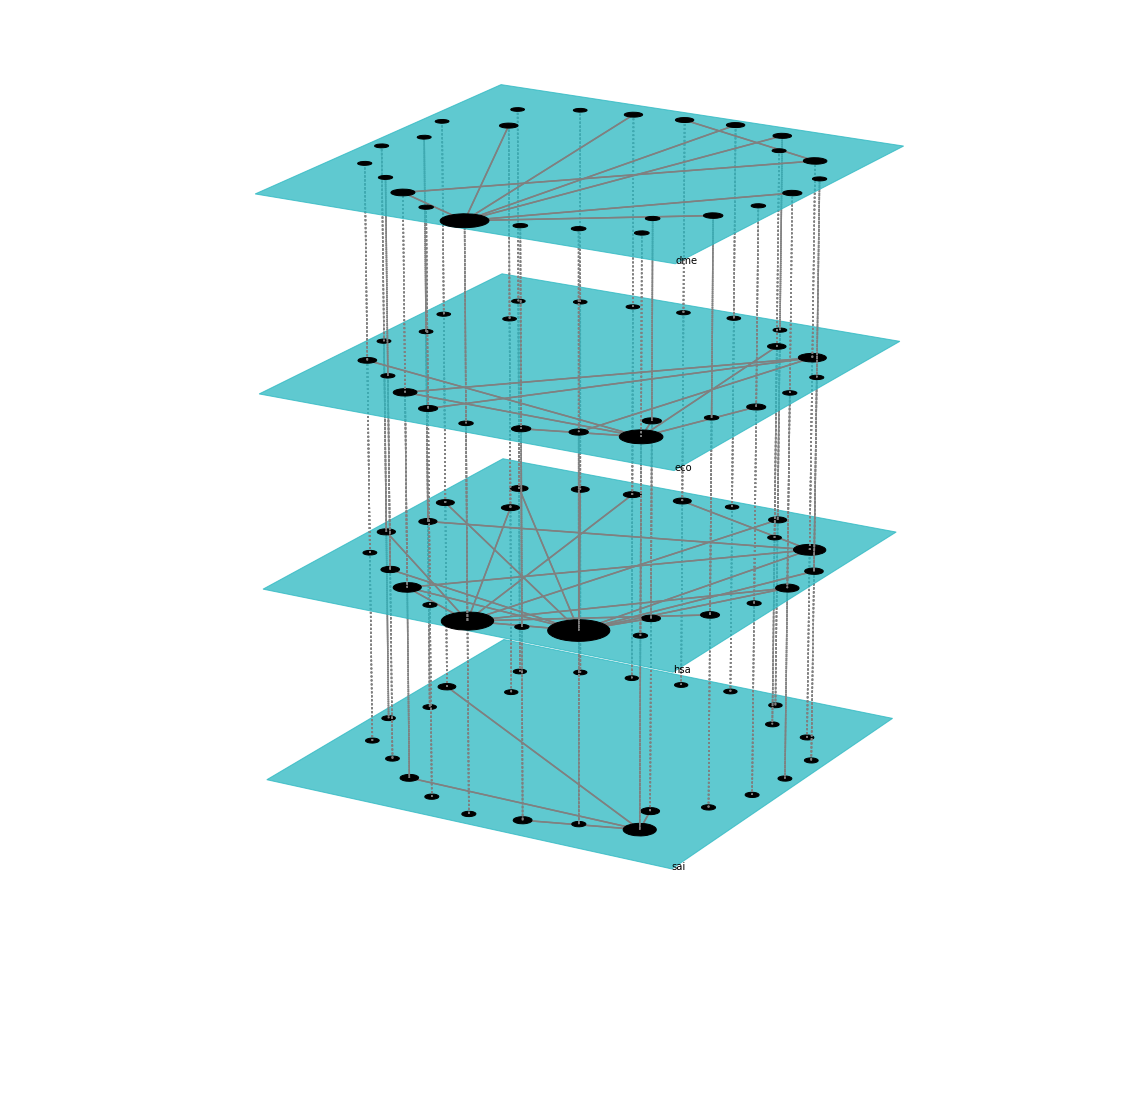

/home/haku/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [19]:


org=[['sai','01040'],['eco','01040'] ,['dme','01040'],['hsa','01040']]
pathnet = MultiplexNetwork(couplings='categorical')

for i in org:
    pathnet.add_layer(i[0]) 
    
    #enzima='UDP-glucose 4-epimerase [EC:5.1.3.2]'
    enzima='methionyl-tRNA synthetase [EC:6.1.1.10]'
    EDGES=locals()['EDGES_'+str(i[0])]
    
    
#    df_in=kp.enzimas_in(EDGES,enzima)
    df_out=kp.enzimas_out(EDGES,enzima)


#    for n in df_in.values:
#        pathnet.A[i[0]][ n[0] , n[1] ] = 1
#        df_in=kp.enzimas_in(EDGES,enzima)
#        for n in df_in.values:
#            pathnet.A[i[0]][ n[0] , n[1] ] = 1
#            df_in=kp.enzimas_in(EDGES,enzima)
#            for n in df_in.values:
#                pathnet.A[i[0]][ n[0] , n[1] ] = 1
        
    for n in df_out.values:
        pathnet.A[i[0]][ n[0] , n[1] ] = 1    
        
        df_out=kp.enzimas_out(EDGES,n[1])
        
        for m in df_out.values:
            pathnet.A[i[0]][ m[0] , m[1] ] = 1 
            
#            df_out=kp.enzimas_out(EDGES,n[1])
        
#            for m in df_out.values:
#                pathnet.A[i[0]][ m[0] , m[1] ] = 1 
        

fig = draw(pathnet, show = True,
             layout = "spring", 
             #layerColorRule = {'r'}, 
             #defaultLayerColor = "Blue", 
             nodeLabelRule = {},
             figsize = (20,20),
             camera_dist = 13,
             azim = 30,
             elev = 20,
             layergap = 0.9, 
             #autoscale = True ,
             #alignedNodes = True,
             nodeSizeRule={"rule":"degree","propscale":0.05}) 
fig.savefig( "net.png" )
fig.show()



2


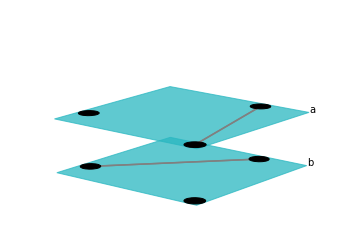

In [58]:
a=[[1,2],[2.3]]
print(a[0][1])
mplex = MultiplexNetwork(couplings="none")
mplex.add_layer('a')
mplex.add_layer('b')
#mnet.add_node(2)
#mplex[1,'a'][2,'a']=1
#mplex.A['a'][1,2]
mplex.A['a'][a[0][0],a[0][1]] = 1
mplex.A['b'][1,3] = 1
fig = draw(mplex, nodeLabelRule = {}, layout = "spring" )